# Background
<a id='background'></a>

The objective of this project is to segment airline customers based on various existing features. This segmentation can provide valuable insights for various purposes, such as targeted marketing, service customization, or understanding customer behavior.

# Data Exploration 
<a id='info'></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df= pd.read_csv('flight.csv')

In [4]:
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
28828,10093,3/4/2007,3/4/2007,Female,4,shanghai,shanghai,CN,39.0,3/31/2014,...,0.0,9616,2/28/2013,398,10.000000,25,0,0.821818,6364,0
58147,7749,12/1/2010,2/24/2011,Male,4,dalianshi,liaoning,CN,49.0,3/31/2014,...,1329.0,3664,3/5/2014,27,14.000000,14,0,0.424309,2461,18
17664,34923,11/14/2011,11/14/2011,Female,4,shantoushi,guangdongsheng,CN,55.0,3/31/2014,...,7070.0,23912,12/12/2013,111,25.772727,124,0,0.577896,12183,1
30076,21031,12/19/2007,7/6/2011,Male,4,beijing,beijing,CN,55.0,3/31/2014,...,6726.0,5867,3/28/2014,4,80.750000,137,0,1.270576,7340,0
14974,40629,5/5/2010,5/5/2010,Female,4,zhengzhou,henan,CN,55.0,3/31/2014,...,4575.0,17801,2/22/2014,39,29.304348,116,4,0.896298,15703,4


In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

**List of Features in Dataset**

- `MEMBER_NO`: Member ID
- `FFP_DATE`: Frequent Flyer Program join date
- `FIRST_FLIGHT_DATE`: First flight date
- `GENDER`: Gender
- `FFP_TIER`: Tier of the Frequent Flyer Program
- `WORK_CITY`: Home city
- `WORK_PROVINCE`: Home province
- `WORK_COUNTRY`: Home country
- `AGE`: Age
- `LOAD_TIME`: Date the data was loaded
- `FLIGHT_COUNT`: Number of flights 
- `BP_SUM`: Future trip (km)
- `SUM_YR_1`: The amount of money spent by customers in the first year since their first flight
- `SUM_YR_2`: The amount of money spent by customers in the second year since their first flight
- `SEG_KM_SUM`: Total distance (km) of flights
- `LAST_FLIGHT_DATE`: Last flight date
- `LAST_TO_END`: The distance from the last flight to the most recent flight
- `AVG_INTERVAL`: Average time interval between flights
- `MAX_INTERVAL`: Maximum time interval between flights
- `EXCHANGE_COUNT`: The number of times customers redeem their loyalty points
- `avg_discount`: Average discount received by customers
- `Points_Sum`: The number of loyalty points the customer earned
- `Point_NotFlight`: Loyalty points not used

In [5]:
# Number of rows and columns
df.shape

(62988, 23)

In [44]:
# Separating numerical variables and categorical variables
cat= df.select_dtypes(include= ['object', 'datetime']).columns
num= df.select_dtypes(include=['int', 'float']).columns

In [9]:
df[cat].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


In [10]:
df[num].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


# Data Preparation
<a id='preparation'></a>

In [12]:
df_prep= df.copy()

## Handling Inconsistency

At this stage, I will convert the data types for variables that are currently misaligned, update variable names, and ensure that categorical variable values are uniformly converted to lowercase.

In [13]:
# Converting the name of the variables to lowercase
df_prep.columns = df_prep.columns.str.lower()

In [14]:
# Converting the data type of variables to the proper type
df_prep.drop(df_prep[df_prep['last_flight_date'].str.contains('2014/2/29')].index, inplace= True) # Some data rows contain the string value February 29, so an error occurs when they are converted to datetime

var = ['ffp_date', 'first_flight_date', 'last_flight_date', 'load_time']

for i in var:
    df_prep[i] = pd.to_datetime(df_prep[i])
    
df_prep['member_no'] = df_prep['member_no'].astype(str)

In [15]:
# Converting categorical values to lowercase
obj= df_prep.select_dtypes(include=['object'])

obj_lower= obj.apply(lambda x: x.str.lower())
df_prep[obj_lower.columns]= obj_lower

In [16]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62567 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   member_no          62567 non-null  object        
 1   ffp_date           62567 non-null  datetime64[ns]
 2   first_flight_date  62567 non-null  datetime64[ns]
 3   gender             62564 non-null  object        
 4   ffp_tier           62567 non-null  int64         
 5   work_city          60312 non-null  object        
 6   work_province      59341 non-null  object        
 7   work_country       62542 non-null  object        
 8   age                62148 non-null  float64       
 9   load_time          62567 non-null  datetime64[ns]
 10  flight_count       62567 non-null  int64         
 11  bp_sum             62567 non-null  int64         
 12  sum_yr_1           62016 non-null  float64       
 13  sum_yr_2           62429 non-null  float64       
 14  seg_km

## Feature Extraction & Handling Abnormal Values

At this stage I will create several new features based on existing features. Apart from making analysis easier, this also helps me detect abnormal values in the dataset.

### `join_to_flight`

This variable contains information on the distance (in days) from when customers joined FFP until their first flight.

In [19]:
# Calculating the interval of days from customers joins FFP program to their first flight
df_prep['join_to_flight']= (df_prep['first_flight_date'] - df_prep['ffp_date']).dt.days

In [21]:
df_prep['join_to_flight'].sort_values()

4455    -38409
30099   -36109
62987        0
18903        0
18902        0
         ...  
60539     3161
50302     3179
58141     3201
60280     3227
29092     3308
Name: join_to_flight, Length: 62567, dtype: int64

The values of -36109 and -38409, which translate to roughly 100 years means that there are 2 customers who had their first flight 100 years before they joined the FFP program. These unreasonable values will be removed.

In [22]:
# Removing abnomal values from 'join_to_flight'
df_prep.drop(df_prep[df_prep['join_to_flight'] < 0].index, inplace=True)

### `fare_sum`

This variable contains the amount of money spent by customers in the first and second year after they took their first flight (`sum_yr_1` + `sum_yr_2`). That means there should be no zero values.

In [23]:
# Calculating 'sum_yr1' + 'sum_yr_2'
df_prep['fare_sum']= df_prep['sum_yr_1'] + df_prep['sum_yr_2']

In [24]:
df_prep['fare_sum'].describe()

count     61876.000000
mean      11002.641206
std       15369.862108
min           0.000000
25%        2762.000000
50%        5930.000000
75%       13056.250000
max      473748.000000
Name: fare_sum, dtype: float64

In [25]:
# Removing abnormal values froom 'fare_sum'
df_prep.drop(df_prep[df_prep['fare_sum'] <= 0].index, inplace= True)

### `point_used`

This variable contains loyalty point usage information (`points_sum` - `point_notflight`).

In [27]:
# Calculating total loyalty points used
df_prep['points_used'] = df_prep['points_sum'] - df_prep['point_notflight']
df_prep['points_used'].describe()

count     62310.000000
mean      12556.179217
std       20549.988560
min          -1.000000
25%        2779.000000
50%        6336.000000
75%       14304.750000
max      985480.000000
Name: points_used, dtype: float64

There should be no minus value in the number of points used.

In [28]:
# Removing abnormal values from 'points_used'
df_prep.drop(df_prep[df_prep['points_used'] < 0].index, inplace= True)

### `membership_time`

The number of days since the customer joined the FFP program by the time the data is acquired.

In [29]:
# Calculating the numer of days since the customers join FFpP program
df_prep['membership_time'] = (df_prep['load_time'] - df_prep['ffp_date']).dt.days

In [30]:
df_prep['membership_time'].describe()

count    62306.000000
mean      1485.560139
std        847.100530
min        365.000000
25%        733.000000
50%       1270.000000
75%       2180.000000
max       3437.000000
Name: membership_time, dtype: float64

## Feature Selection

Some of the features below will be removed because they are considered less relevant, contain many value input errors, or are considered redundant because they are already represented by other features.

### `avg_discount`

For the amount of discount received by customers, I think it's strange if the value is greater than 1. That means apart from getting free tickets, they also get cashback, which is unreasonable. Therefore, I will delete discount values above 1.

In [31]:
# Removing abnormal values from 'avg_discount'
df_prep.drop(df_prep[df_prep['avg_discount'] > 1].index, inplace= True)

### `work_city` `work_province`

After checking the unique values on the `work_city` and `work_province` variables, I found a lot of inconsistencies and input errors. These two variables will be dropped.

In [32]:
df_prep.drop(['work_city', 'work_province'], axis= 1, inplace= True)

### `exchange_count`

I assume the `exchange_count` variable is information on how many times a customer exchanges their loyalty points. However, the value of this variable does not make sense because in the `point_notflight` variable, the majority of loyalty points have been exchanged. Apart from that, I think the variables `point_notflight` and `point_sum` are sufficient to represent customer loyalty point usage. Therefore, I will drop the `exchange_count` variable.

In [33]:
df_prep.drop(['exchange_count'], axis= 1, inplace= True)

### `ffp_date` `first_flight_date` `load_time` `sum_yr_1` `sum_yr_2` `last_flight_date` `max_interval` `points_sum` `point_notflight`

I consider some of the variables that will be deleted below are already represented by other variables in the dataset.

In [35]:
# Dropping irrelevant variables
to_drop= ['ffp_date', 'first_flight_date', 'load_time', 'sum_yr_1', 'sum_yr_2', 'last_flight_date', 'max_interval', 'points_sum', 'point_notflight']

df_prep.drop(to_drop, axis= 1, inplace= True)

In [36]:
df_prep.sample(5)

,member_no,gender,ffp_tier,work_country,age,flight_count,bp_sum,seg_km_sum,last_to_end,avg_interval,avg_discount,join_to_flight,fare_sum,points_used,membership_time
20297,41085,male,4,cn,33.0,13,12331,14815,9,58.583333,0.813725,181,11336.0,12331,1164
18845,19346,female,4,cn,55.0,9,12843,13319,121,73.500000,0.974455,234,14249.0,12843,2513
4078,18868,male,4,cn,41.0,24,30420,53083,42,28.086957,0.716539,1553,32372.0,34418,2848
47572,57998,female,4,cn,45.0,2,1990,5454,240,5.000000,0.580000,0,2668.0,1990,1766
59902,43042,male,4,cn,29.0,3,1223,1633,88,124.500000,0.781261,202,1630.0,1223,537


## Handling Missing and Duplicated Values

In [37]:
# Checking for duplicated values
df_prep.duplicated().sum()

0

In [38]:
# Checking for null values
df_prep.isna().sum()

member_no            0
gender               1
ffp_tier             0
work_country        22
age                385
flight_count         0
bp_sum               0
seg_km_sum           0
last_to_end          0
avg_interval         0
avg_discount         0
join_to_flight       0
fare_sum           676
points_used          0
membership_time      0
dtype: int64

Since the number of null values is small compared to the total data, I will delete all rows that contain null values.

In [39]:
# Removing null values
df_prep.dropna(inplace= True)

In [40]:
df_prep.isna().sum()

member_no          0
gender             0
ffp_tier           0
work_country       0
age                0
flight_count       0
bp_sum             0
seg_km_sum         0
last_to_end        0
avg_interval       0
avg_discount       0
join_to_flight     0
fare_sum           0
points_used        0
membership_time    0
dtype: int64

# RFM Analysis for Clustering Criteria
<a id='rfm'></a>

RFM (Recency, Frequency, Monetary) analysis is important in understanding customer behavior. Recency (R) provides an overview of the level of customer engagement in recent times. Frequency (F) expresses how often a customer makes a purchase, while Monetary (M) reflects its financial impact. Customers with high R may have different preferences than customers with low R. A high F reflects someone who shops frequently with preferences that may be different, and a high M indicates a customer with a large financial contribution, who may have different needs than a customer with a low M.

The following are variables that can represent RFM (Recency, Frequency, Monetary):
- Recency (R): `last_to_end`
The time elapsed from the last flight to the most recent flight order can represent how recently the customer last made a purchase.
- Frequency (F): `flight_count`
The number of flights taken by a customer is an indicator of how often they use flight services.
- Monetary (M): `fare_sum`
The amount of money customers spend in the first and second year after their first flight can reflect how much of a financial impact they have on your business.

Apart from the variables above that have been identified to represent RFM, another variable that can also be considered for use is `membership_time`. The length of a customer's membership in FFP can influence their level of engagement and loyalty. Customers who have been members for a longer time may behave differently than new customers.

Based on the considerations above, I will create a new dataframe using only related variables to be processed in the following stages.

In [108]:
df_rfm= df_prep[['member_no', 'last_to_end', 'flight_count', 'fare_sum', 'membership_time']]

In [109]:
df_rfm.sample(5)

,member_no,last_to_end,flight_count,fare_sum,membership_time
26976,17983,106,7,6890.0,2174
3763,41028,5,28,37753.0,1026
7513,9579,1,29,18518.0,2932
6561,4465,98,14,24132.0,1286
30558,24154,273,5,6164.0,817


# EDA
<a id='eda'></a>

## Data Distribution

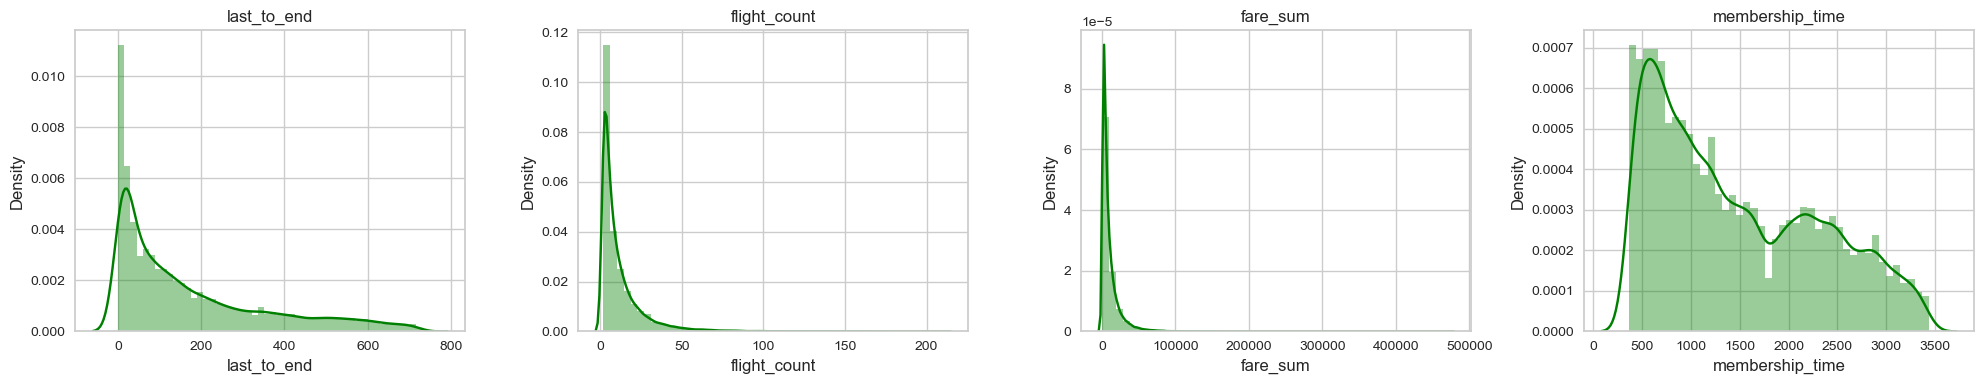

In [110]:
# Plotting data distribution
var_dist = [col for col in df_rfm.columns if col != 'member_no']

plt.figure(figsize= (20, 4))
for i in range(0, len(var_dist)):
    plt.subplot(1, 4, i+1)
    sns.distplot(df_rfm[var_dist[i]], color= 'green')
    plt.title(var_dist[i])
plt.tight_layout()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

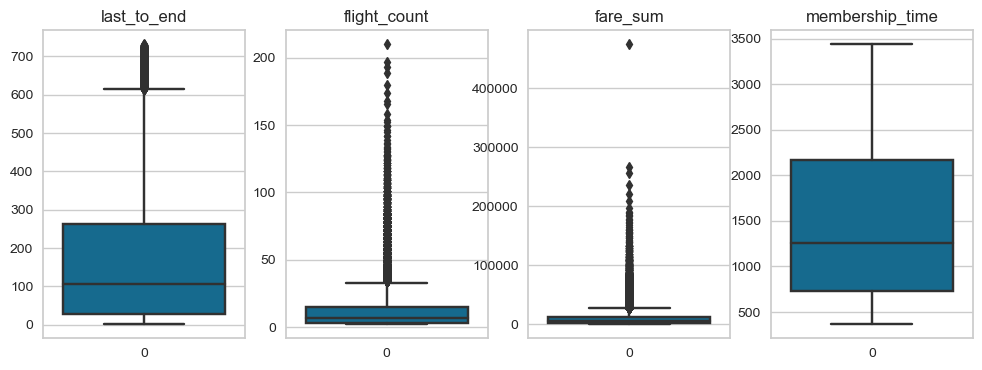

In [111]:
plt.figure(figsize= (12, 4))
for i in range(0, len(var_dist)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(df_rfm[var_dist[i]])
    plt.title(var_dist[i])
plt.tight_layout

## Feature Correlation

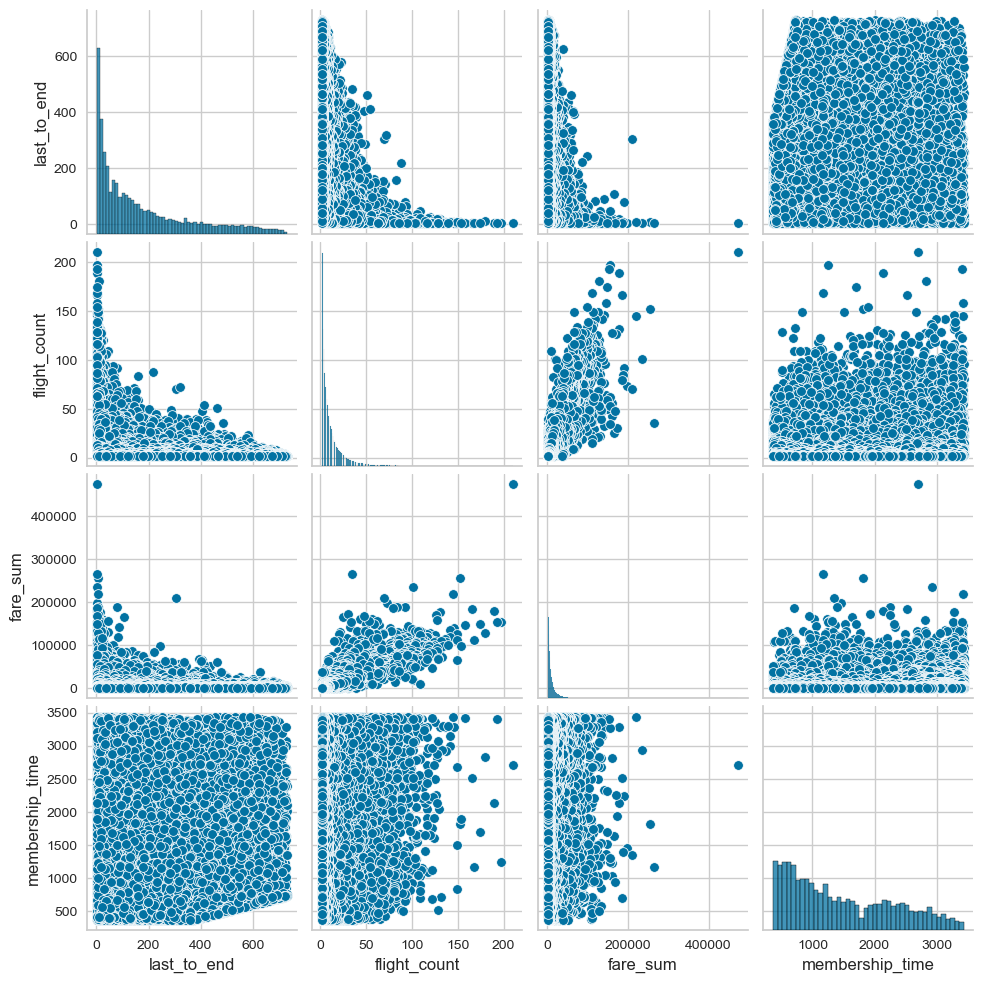

In [112]:
# Plotting pairplot
sns.pairplot(df_rfm)

<Axes: >

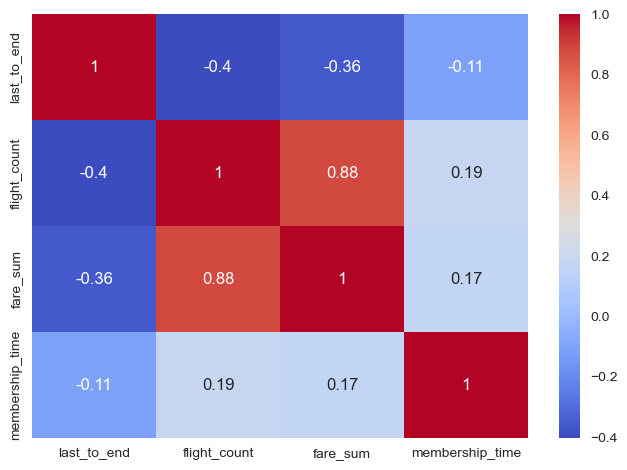

In [113]:
# Plotting correlation between variables
correlation= df_rfm.drop('member_no', axis= 1).corr()

sns.heatmap(correlation, annot= True, cmap= 'coolwarm')

# Data Preprocessing
<a id='preprocess'></a>

## Outliers Handling

In [114]:
# Creating function to check and delete outliers
def outlier_check(df, mode='check'):
    df_clean = df.copy()  # Copy the DataFrame to avoid modifying the original
    
    for i in df.columns:
        if i == 'member_no':
            continue
          
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        lower_tail = q1 - (1.5 * iqr)
        upper_tail = q3 + (1.5 * iqr)
    
        total_outlier = ((df[i] <= lower_tail) | (df[i] >= upper_tail)).sum()
        total_row = df[i].count()
        outlier_percentage = round((total_outlier / total_row) * 100, 2)
    
        if mode == 'check':
            print(f'Total outliers in {i}: {total_outlier} with percentage: {outlier_percentage}%')
        elif mode == 'delete':
            df_clean = df_clean[(df_clean[i] >= lower_tail) & (df_clean[i] <= upper_tail)]
        else:
            print('Choose the appropriate mode (check, delete, or drop)')
    
    if mode == 'delete':
        return df_clean

In [115]:
# Checking outliers
outlier_check(df_rfm, 'check')

Total outliers in last_to_end: 1917 with percentage: 3.29%
Total outliers in flight_count: 4122 with percentage: 7.07%
Total outliers in fare_sum: 4686 with percentage: 8.04%
Total outliers in membership_time: 0 with percentage: 0.0%


In [116]:
df_clean= outlier_check(df_rfm, 'delete')

In [117]:
df_clean.shape

(51076, 5)

## Features Scaling

In [118]:
df_std= df_clean.drop('member_no', axis= 1).copy()

In [90]:
# Standardazing data scale
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
var_std = ss.fit_transform(df_std)

for i, col in enumerate(df_std):
    df_std[col] = var_std[:, i]

In [91]:
df_std.describe()

,last_to_end,flight_count,fare_sum,membership_time
count,5.107600e+04,5.107600e+04,5.107600e+04,5.107600e+04
mean,8.903347e-17,4.451673e-17,-2.671004e-17,1.246469e-16
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.045739e+00,-9.676860e-01,-1.185278e+00,-1.288621e+00
25%,-8.242158e-01,-8.229282e-01,-7.722571e-01,-8.798527e-01
50%,-3.380943e-01,-3.886547e-01,-3.340092e-01,-2.613064e-01
75%,5.541539e-01,4.798922e-01,5.023409e-01,8.151560e-01
max,2.726317e+00,3.519807e+00,3.350239e+00,2.393888e+00


# Clustering
<a id='cluster'></a>

First of all, we will determine the number of clusters that can be formed by calculating the inertia and visualizing it

## Inertia Check 

Text(0.5, 1.0, 'Inertia Visualized')

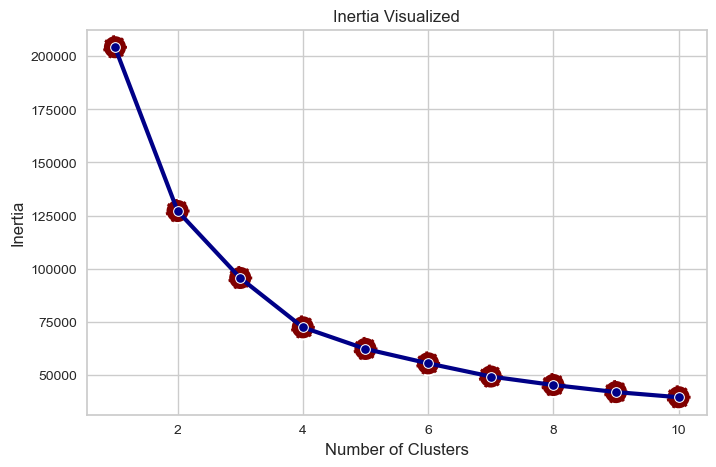

In [104]:
from sklearn.cluster import KMeans

# Calculating inertia score for 2 to 10 clusters
inertia= []

for i in range(1, 11):
    kmeans= KMeans(n_clusters= i, init= 'k-means++', max_iter= 300, n_init= 10, random_state= 0)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)
    
# Visualizing inertia
plt.figure(figsize= (8, 5))
sns.lineplot(x= range(1, 11), y= inertia, marker='o', color = '#000087', linewidth = 3)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia Visualized')

From the visualization above, it is not very clear how many of the best clusters can be formed. Therefore, let's try to determine it by looking at the silhouette score.

## Silhouette Score

Text(0.5, 1.0, 'Silhouette Score')

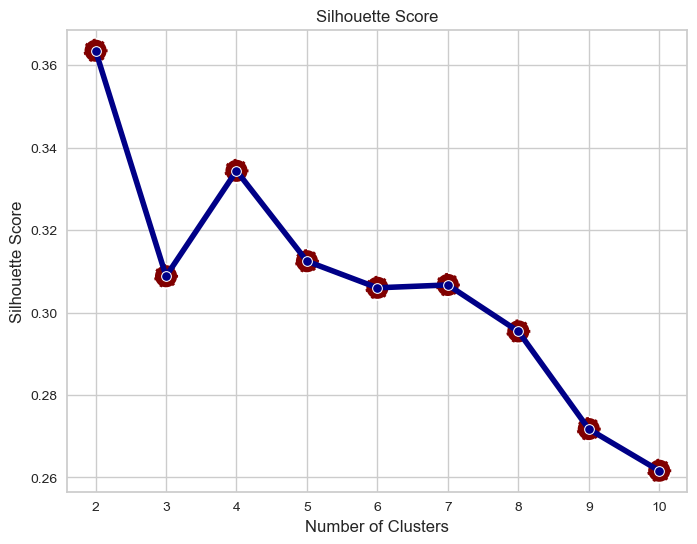

In [105]:
from sklearn.metrics import silhouette_score

# Calculating silhouette score for 2 to 10 clusters
cluster_number = list(range(2, 11))
silhouette_scores= []

for i in cluster_number:
    kmeans= KMeans(n_clusters= i, init= 'k-means++', max_iter= 300, n_init= 10, random_state= 0).fit(df_std)
    cluster_labels= kmeans.predict(df_std)
    
    score = silhouette_score(df_std, cluster_labels, metric= 'euclidean')
    silhouette_scores.append(score)
    
# Visualizing silhouette score
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=silhouette_scores,  marker='o', color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=silhouette_scores, s=300, color='#800000',  linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

From the visualization above it can be seen that the optimal number of clusters that can be formed is 4 clusters.

## Clustering

In [100]:
from sklearn.cluster import KMeans

# Clustering
kmeans= KMeans(n_clusters= 4, init= 'k-means++', max_iter= 300, n_init= 10, random_state= 0)
kmeans.fit(df_std)

# Saving the clustering result label into 'clusters' variable
clusters= kmeans.labels_

## Visualizing Clustering Result

Since more than 2 features are used to perform clustering, I will use PCA to reduce the dimension of the variable to 2, and then visualize them using a scatterplot.

In [101]:
from sklearn.decomposition import PCA

# Reducing dimensions using PCA
pca= PCA(n_components= 2)
pca.fit(df_std)
pcs= pca.transform(df_std)

# Creating new df contains the result of PCA
df_pca= pd.DataFrame(data= pcs, columns = ['PC 1', 'PC 2'])
df_pca['cluster'] = clusters

### Silhouette Score

In [102]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


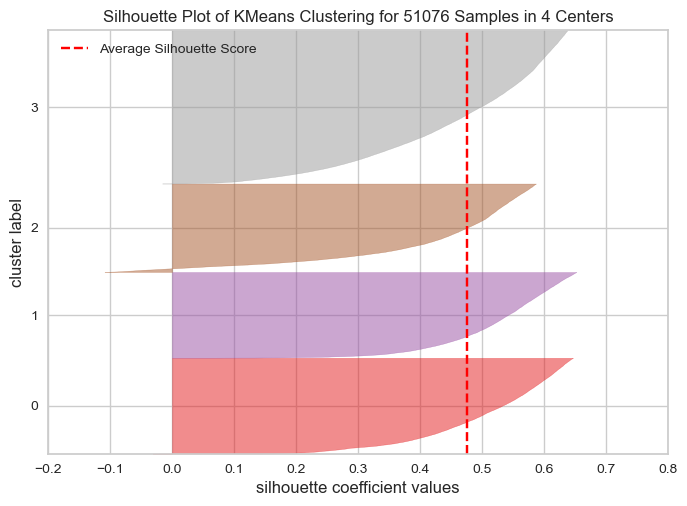

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 51076 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [103]:
from yellowbrick.cluster import SilhouetteVisualizer

# Visualizing silhouette coeff.
model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(df_pca)
visualizer.poof()

It can be seen above that the average silhouette score is 0.48, and that each cluster has a silhouette coefficient above 0.55. This indicates that the clusters are reasonably well-defined and distinct from each other.

### Cluster Distributions

<Axes: xlabel='PC 1', ylabel='PC 2'>

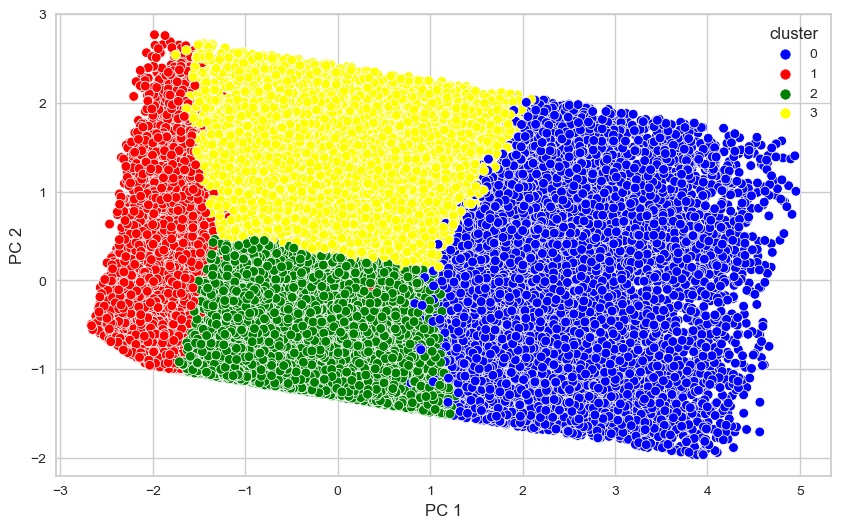

In [106]:
# Visualizing clusters distribution
fig, ax= plt.subplots(figsize= (10, 6))

sns.scatterplot(data= df_pca, x= 'PC 1', y= 'PC 2', hue= 'cluster', palette=['blue','red','green','yellow'])

## Cluster Analysis

At this stage I will add the clustering result labels to df_clean, where the values of the variables have not been normalized, so they are easier to interpret.

In [119]:
# Adding 'cluster' to df_clean
df_clean['cluster'] = clusters

df_clean.sample(5)

,member_no,last_to_end,flight_count,fare_sum,membership_time,cluster
32740,49425,61,14,6883.0,1333,2
58534,43248,217,2,1475.0,497,2
29305,38611,78,9,4989.0,2348,3
39747,13154,112,6,4807.0,1573,2
23226,59554,28,12,4326.0,826,2


### Statistical Description

In [122]:
# Grouping by 'cluster' and displaying the statistical description
df_clean.groupby('cluster').agg(['min', 'max','mean','median'])

member_no                     last_to_end                          \
              min   max mean   median         min  max        mean median   
cluster                                                                     
0            1000  9997  inf  31693.0           1  581   64.228911   35.0   
1           10010  9998  inf  31949.5         223  614  433.670504  427.5   
2             101    98  inf  32573.5           1  359  107.090753   94.0   
3           10001  9999  inf  29772.0           1  560  128.201714  109.0   

        flight_count                       fare_sum                         \
                 min max       mean median      min      max          mean   
cluster                                                                      
0                  3  33  19.744323   19.0    721.0  27220.0  16787.289497   
1                  2  20   3.846669    3.0    175.0  22640.0   3312.000782   
2                  2  27   6.565831    6.0    227.0  20249.0   5264.391915   
3                  2  25   6.623409    6.0    162.0  21900.0   5437.226214   

                 membership_time                             
          median             min   max         mean  median  
cluster                                                      
0        16253.0             365  3437  1607.156537  1483.0  
1         2565.0             365  3437  1169.711832   975.5  
2         4679.5             365  1714   868.135375   808.0  
3         4796.0            1591  3437  2457.917843  2417.0

**Statistical Summaries:**

1. Cluster 0:
- Recent Engagement: Customers in this cluster have a recent engagement with a mean of 64.23 days since their last flight.
- Flight Frequency: They take an average of 19.74 flights, indicating a moderate level of activity.
- Spending Power: They spend an average of 16,787.29 units on fares.
- Membership Duration: They have been members for an average of 1,607.16 days.

2. Cluster 1:
- Recent Engagement: Customers in this cluster have a relatively longer engagement with a mean of 433.67 days since their last flight.
- Flight Frequency: They take an average of 3.85 flights, indicating lower activity.
- Spending Power: They spend an average of 3,312 units on fares.
- Membership Duration: They have been members for an average of 1,169.71 days.

3. Cluster 2:
- Recent Engagement: Customers in this cluster have a recent engagement with a mean of 107.09 days since their last flight.
- Flight Frequency: They take an average of 6.57 flights, indicating a moderate level of activity.
- Spending Power: They spend an average of 5,264.39 units on fares.
- Membership Duration: They have been members for an average of 868.14 days.

4. Cluster 3:
- Recent Engagement: Customers in this cluster have a recent engagement with a mean of 128.20 days since their last flight.
- Flight Frequency: They take an average of 6.62 flights, indicating a moderate level of activity.
- Spending Power: They spend an average of 5,437.23 units on fares.
- Membership Duration: They have been members for an average of 2,457.92 days.

### Cluster Grouping

Based on the characteristics of the clusters, we can assign them into different tiers based on their level of engagement, activity, spending power, and membership duration.

**VIP Tier (Highest Tier): Cluster 0**</br>
This cluster exhibits a high level of engagement, takes a significant number of flights, spends a substantial amount on fares, and has been a member for a long time. Therefore, we can consider Cluster 0 as the VIP tier.

**Premium Tier: Cluster 2**</br>
This cluster also demonstrates a good level of engagement and activity. While not as high as Cluster 0, they still engage well with the services, have a decent flight count, and spend a considerable amount on fares. They have been members for a moderate duration, making them a strong customer segment.

**Standard Tier: Cluster 3**</br>
This cluster shows moderate levels of engagement, flight activity, and spending power. They have a reasonable membership duration but not as long as the VIP and Premium tiers. We can consider Cluster 3 as the Standard tier.

**Basic Tier (Lowest Tier): Cluster 1**</br>
This cluster has the lowest level of engagement, with the longest time since their last flight. They take fewer flights and spend less on fares. Their membership duration is relatively short compared to the other clusters, indicating less active participation. Therefore, we can consider Cluster 1 as the Basic tier.

In [123]:
# Calculating numbers of members for each cluster 
df_clean['cluster'].value_counts().to_frame().reset_index().rename(columns={"index": "cluster", "cluster": "members_count"})

,cluster,members_count
0,2,18578
1,3,11551
2,1,10598
3,0,10349


## Business Recommendation

Based on the tier assignments, here are some business recommendations tailored to each customer tier:

**VIP Tier (Highest Tier): Cluster 0**</br>
- Personalized Rewards and Offers: Offer exclusive benefits, discounts, or special privileges to VIP customers to enhance their experience and show appreciation for their loyalty.
- Premium Services: Provide top-notch services such as priority boarding, dedicated customer support, and access to VIP lounges to make their travel experience even more luxurious.
- Tailored Marketing Communications: Send personalized recommendations, travel tips, and promotions based on their historical preferences and behavior.
- Feedback and Engagement: Seek their feedback and actively engage with them to understand their needs better and make improvements where necessary.

**Premium Tier: Cluster 2**</br>
- Special Promotions: Offer targeted promotions and discounts to encourage them to increase their frequency of travel and spending.
- Exclusive Offers: Provide access to limited-time offers and benefits to incentivize their continued engagement.
- Recognition and Acknowledgment: Acknowledge their loyalty with a tier-specific loyalty program that rewards them for their consistent business.

**Standard Tier: Cluster 3**</br>
- Incentivize More Engagement: Encourage them to increase their engagement by offering incentives like bonus points or discounts for additional flights or services.
- Membership Benefits: Provide incentives to upgrade their tier by offering benefits that align with the Premium or VIP tiers.
- Promote Upcoming Events: Highlight special events, promotions, or new services to entice them to book more flights and participate in other offerings.

**Basic Tier (Lowest Tier): Cluster 1**</br>
- Re-Engagement Campaigns: Implement re-engagement campaigns to bring them back into active participation, potentially with special offers or promotions.
- Introduce Entry-Level Benefits: Offer introductory benefits to encourage them to explore more services and gradually move up to higher tiers.
- Solicit Feedback: Seek their input on how to improve their experience and services to better meet their needs and preferences.